# Importing the required libraries

In [ ]:
!pip install tensorflow --upgrade

In [6]:
import numpy as np
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #onvoLutiona l Layer
from keras.optimizers import Adam #opt imizer
from keras. utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization

# Load data

In [7]:
(x_train, y_train), (x_test, y_test)=mnist.load_data () #splitting the mnist data into train and test

11490434/11490434 [==============================] - 0s 0us/step


In [9]:
print (x_train.shape)  #shape is used for give the dimens ion values #60000-rows 28x28-pixels
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [10]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

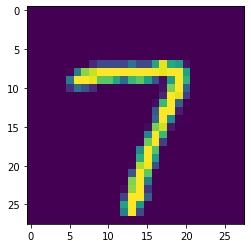

In [11]:
plt.imshow(x_train[5100])     #ploting the index=image

In [12]:
np.argmax(y_train[5100])

0

# Reshaping Dataset

In [13]:
#Reshaping to format which CNN expects (batch, height, width, channels)
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')

# Applying One Hot Encoding

In [14]:
number_of_classes = 10  #storing the no of classes in a variable

In [15]:
y_train = np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test = np_utils.to_categorical (y_test, number_of_classes)

# Add CNN Layers

In [18]:
#create model
model=Sequential ()

In [19]:
#adding modeL Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [20]:
#flatten the dimension of the image
model.add(Flatten())

In [21]:
#output layer with 10 neurons
model.add(Dense(number_of_classes,activation = 'softmax'))

# Compiling the model

In [22]:
#Compile model
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [23]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

# Train the model

In [24]:
#fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 112s 59ms/step - loss: 0.2592 - accuracy: 0.9485 - val_loss: 0.0909 - val_accuracy: 0.9735
Epoch 2/5
1875/1875 [==============================] - 111s 59ms/step - loss: 0.0699 - accuracy: 0.9787 - val_loss: 0.0885 - val_accuracy: 0.9735
Epoch 3/5
1875/1875 [==============================] - 111s 59ms/step - loss: 0.0486 - accuracy: 0.9844 - val_loss: 0.0781 - val_accuracy: 0.9765
Epoch 4/5
1875/1875 [==============================] - 112s 60ms/step - loss: 0.0350 - accuracy: 0.9890 - val_loss: 0.1090 - val_accuracy: 0.9762
Epoch 5/5
1875/1875 [==============================] - 112s 60ms/step - loss: 0.0298 - accuracy: 0.9905 - val_loss: 0.1120 - val_accuracy: 0.9750


# Observing the metrics

In [25]:
# Final evaluation of the model
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.11199608445167542, 0.9750000238418579]


# Test The Model

In [26]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

1/1 [==============================] - 0s 92ms/step
[[2.67491224e-10 2.61221627e-13 7.80754628e-11 1.13754493e-06
  2.32089789e-07 1.54972255e-07 1.30238485e-11 1.04400478e-05
  1.59104224e-04 9.99828935e-01]]


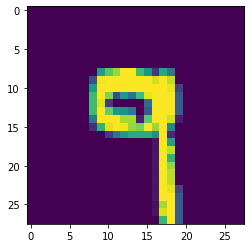

In [27]:
plt.imshow(x_test[6000])

In [28]:
import numpy as np
print(np.argmax(prediction, axis=1)) #printing our Labels from first 4 images

[9]


In [29]:
np.argmax(y_test[6000:6001]) #printing the actual labels

9

# Save The model

In [30]:
# Save the model
model.save('models/mnistCNN.h5')

In [31]:
cd models

/home/wsuser/work/models


In [32]:
!tar -zcvf hdr_deployment.tgz mnistCNN.h5

mnistCNN.h5


In [33]:
ls -1

hdr_deployment.tgz
mnistCNN.h5


In [34]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 17.1 MB/s eta 0:00:01


# Cloud deploy

In [1]:
from ibm_watson_machine_learning import APIClient
credentials ={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"dDaXtPFf6qqMmqt2N4-FhCk47g5agq_3VE8CQdxIaeXv"
}
client = APIClient(credentials)
client

Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.


In [2]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:us-south:a/7a8a78be34764cf587882238687f170c:f0994e5d-08dc-4690-b055-ef490176c91c::',
      'guid': 'f0994e5d-08dc-4690-b055-ef490176c91c',
      'name': 'Watson Machine Learning-ji',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'imagerecognition',
    'scope': {'bss_account_id': '7a8a78be34764cf587882238687f170c'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': '1fc67aac-8bd0-4ece-a2ee-8d4ce03c9d47',
      'bucket_region': 'us-south',
      'credentials': {'admin': {'access_key_id': '11e85fb168ff442b86e85c5de21bc5ca',
        'api_key': '6yCbwj0SzR7kuZbW5gk-tPdokbgiPHS-gG1Qoz-bBvr0',
        'secret_access_key': '0d57ad46237e982e7f570e1bff32b2b50cd209f5d94ed7cd',
        'service_id': 'ServiceId-a8500abe-083c-4db5-8ff0-350ec49c46d8'},
       'editor': {'access_key_id': 'bcce2ad62da4438cb6ef0c162c7d2126',
        'api

In [4]:
def guid_from_space_name(client,deploy):
  space = client.spaces.get_details()
  return (next(item for item in space['resources'] if item['entity']['name']==deploy)['metadata']['id'])

In [6]:
space_uid = guid_from_space_name(client,'imagerecognition')
print("Space UID = " + space_uid)

Space UID = 1dd2f655-0269-4c54-8299-f44a53d5f9f4


In [7]:
client.set.default_space(space_uid)

'SUCCESS'

In [40]:
client.software_specifications.list(limit=100)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [41]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [42]:
model_details = client.repository.store_model(model='hdr_deployment.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"Digit Recognition System",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [43]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-20T06:20:31.088Z',
  'id': '22a267f2-65e1-4664-a1c3-96fee9a4d91e',
  'modified_at': '2022-11-20T06:20:33.799Z',
  'name': 'Digit Recognition System',
  'owner': 'IBMid-6630042PQG',
  'resource_key': 'afa02754-ca1b-4e6f-b664-adbbc263aace',
  'space_id': '1dd2f655-0269-4c54-8299-f44a53d5f9f4'},
 'system': {'warnings': []}}

In [44]:
model_id = client.repository.get_model_id(model_details)
model_id

'22a267f2-65e1-4664-a1c3-96fee9a4d91e'

In [8]:
client.repository.download("22a267f2-65e1-4664-a1c3-96fee9a4d91e",'DigitRecog_IBM_model.tar.gz')

Successfully saved model content to file: 'DigitRecog_IBM_model.tar.gz'


'C:\\Users\\SASI\\Downloads/DigitRecog_IBM_model.tar.gz'

In [46]:
ls

DigitRecog_IBM_model.tar.gz  hdr_deployment.tgz  mnistCNN.h5


# Test Model

In [47]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from PIL import Image
import numpy as np

In [48]:
model = load_model("mnistCNN.h5")

In [49]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='GfuQmpxAER-s0TuGw2Cu3VXmEOkVxzE6DeF5g1yqzWMu',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'cnn-donotdelete-pr-zpnlgqvxjjutbk'
object_key = '3.jpg'

streaming_body_4 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/

In [51]:
img = Image.open(streaming_body_4).convert("L") # convert image to monochrome
img = img.resize( (28,28) ) # resizing of input image

In [52]:
img

In [53]:
im2arr = np.array(img) #converting to image
im2arr = im2arr.reshape(1, 28, 28, 1) #reshaping according to our requirement

In [54]:
pred = model.predict(im2arr)
print(pred)

1/1 [==============================] - 0s 62ms/step
[[5.7334788e-15 1.8596921e-11 2.2998947e-10 9.9999988e-01 7.4882539e-12
  2.7414602e-09 7.3426589e-09 7.6594746e-12 9.3451503e-11 8.6917986e-08]]


In [55]:
print(np.argmax(pred, axis=1)) #printing our Labels

[3]
